In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

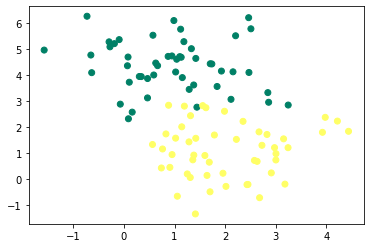

In [8]:
X,y=make_blobs(n_samples=100,n_features=2,centers=2,random_state=0)
y=y.reshape((y.shape[0],1))
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
plt.show()

In [9]:
def initialisation(X):
    W=np.random.randn(X.shape[1],1)
    b=np.random.randn(1)
    return W,b

In [11]:
W,b=initialisation(X)
W
b

array([0.64188815])

In [33]:
def model(X,W,b):
    Z=X.dot(W)+b
    A=1/(1+np.exp(-Z))
    return A

In [15]:
Z,A=model(X,W,b)
print(A.shape)

(100, 1)


In [16]:
def logloss(A,y):
    return 1/len(y)*np.sum(-y*np.log(A)-(1-y)*np.log(1-A))

In [17]:
print(logloss(A,y))

1.4382928404823119


In [20]:
def gradient(A,X,y):
    dw=1/len(y)*np.dot(X.T,A-y)
    db=1/len(y)*np.sum(A-y)
    return dw,db

In [38]:
def update(dw,db,W,b,learning_rate):
    W=W-learning_rate*dw
    b=b-learning_rate*db
    return W,b

In [39]:
def predict(X,W,b):
    A=model(X,W,b)
    return A>0.5

In [41]:
def artificial_neuron(X,y,learning_rate=0.1,nbre_iterations=100):
    #initialisations de W,b
    W,b=initialisation(X)
    Loss=[]
    for i in range(nbre_iterations):
        A=model(X,W,b)
        Loss.append(logloss(A,y))
        dw,db=gradient(A,X,y)
        W,b=update(dw,db,W,b,0.2)
        
    y_pred=predict(X,W,b)
    print(accuracy_score(y_pred,y))
    plt.plot(Loss)
    plt.show()
    

0.94


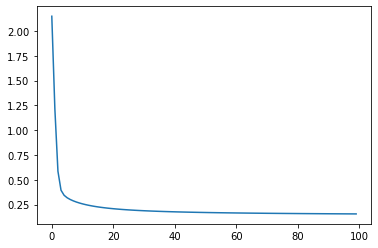

In [42]:
artificial_neuron(X,y)
